# About the Dataset

### Title:
Haberman’s Survival Data

### Description: 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information:
Age of patient at the time of operation (numerical) <br />
Patient’s year of operation (year — 1900, numerical) <br />
Number of positive axillary nodes detected (numerical) <br />

##### Survival status (class attribute) : 
1 = the patient survived 5 years or longer <br />
2 = the patient died within 5 years

# Importing libraries and loading the file

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#read the csv file
haber = pd.read_csv("haberman.csv")

In [ ]:
# Understanding the data

In [9]:
#print first 5 lines of the dataset
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
#prints the number of rows and number of columns
haber.shape

(306, 4)

In [12]:
#brief info about the dataset
print(haber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


# Observations

1)There are no missing values in this data set. <br />
<br />
2)All the columns are of the integer data type. <br />
<br />
3)The datatype of the status is an integer, it has to be converted to a categorical datatype <br />
<br />
4)In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.

In [14]:
#mapping the values of 1 and 2 to yes and no respectively 
haber['status'] = haber['status'].map({1:'Yes', 2:'No'})
haber.head() 

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [15]:
#describes the dataset
haber.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observations

1)Count : Total number of values present in respective columns. <br />
<br />
2)Mean: Mean of all the values present in the respective columns. <br />
<br />
3)Std: Standard Deviation of the values present in the respective columns. <br />
<br />
4)Min: The minimum value in the column. <br />
<br />
5)25%: Gives the 25th percentile value. <br />
<br />
6)50%: Gives the 50th percentile value. <br />
<br />
7)75%: Gives the 75th percentile value. <br />
<br />
8)Max: The maximum value in the column.

In [19]:
#prints each count of the status type
haber['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

# Observations

1)The value_counts() defines how many patients survived and how many did not survive. <br />
<br />
2)Out of 306 patients, 225 patients survived and 81 did not.<br />
<br />
3)The dataset is imbalanced.

In [22]:
#stores all the records where status is yes in new dataframe
status_yes = haber[haber['status']=='Yes']
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [23]:
#stores all the records where status is no in new dataframe other than previous one
status_no = haber[haber['status']=='No']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


# Observations

1)The mean age and the year in which the patients got operated are almost similar of both the classes, while the mean of the nodes of both the classes differs <br />

# Analysis

### 1) Probability Density Function

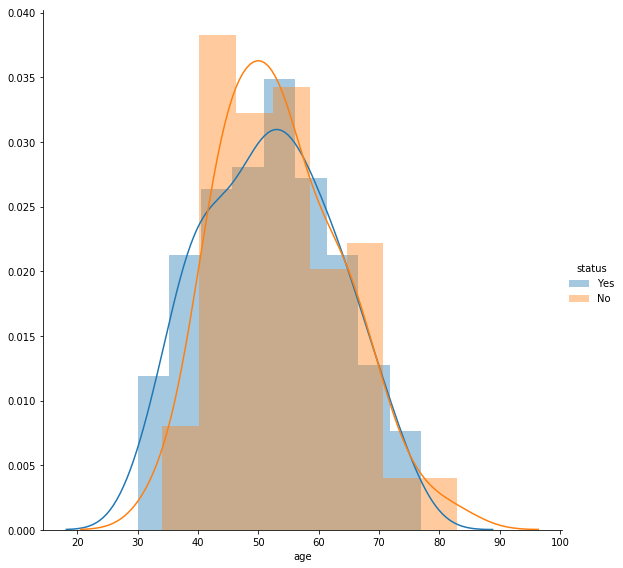

In [30]:
sns.FacetGrid(haber,hue='status',height = 8)\
 .map(sns.distplot,'age')\
 . add_legend();
plt.show()

# Observations

1)Overlapping is there,therefore survival chances are irrespective of a person’s age. <br />
<br />
2)Whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving. <br />
<br />
3)Still, we can't predict the survival of a person with only parameter age.

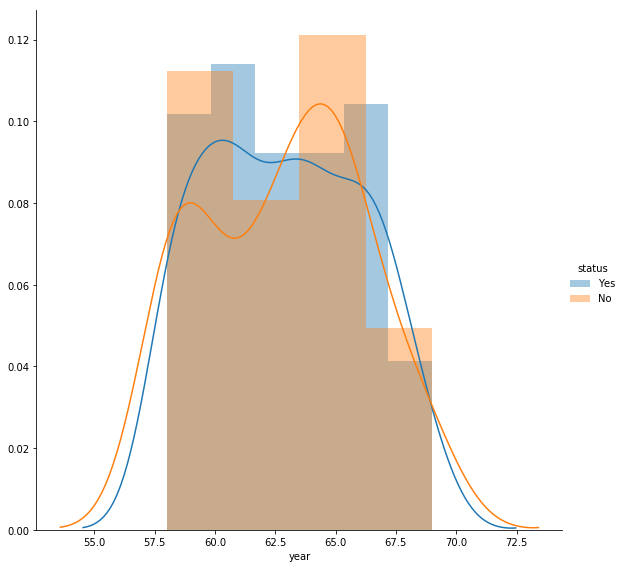

In [31]:
sns.FacetGrid(haber,hue='status',height = 8)\
 .map(sns.distplot,'year')\
 . add_legend();
plt.show()

### Observations:
1)Another Overlapping is there.It shows how many of the operations were successful and how many weren’t in a range of years. <br />
<br />
2)This cannot be a parameter to decide the patient’s survival chances. <br />
<br />
3)However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations. 

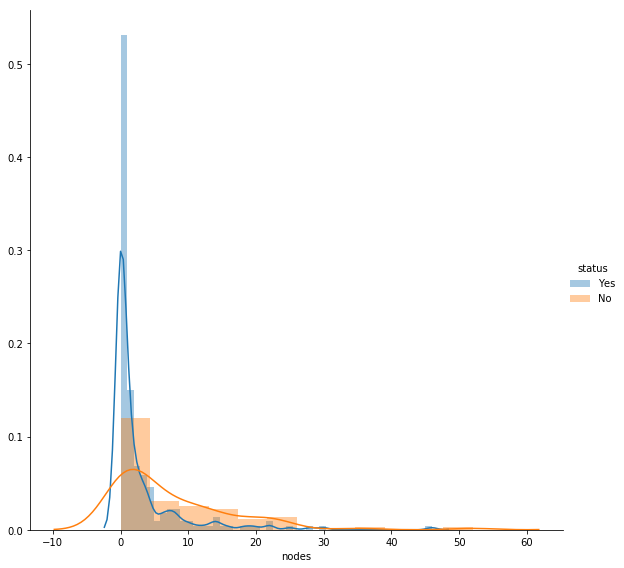

In [32]:
sns.FacetGrid(haber,hue='status',height = 8)\
 .map(sns.distplot,'nodes')\
 . add_legend();
plt.show()

# Observations:
1)Patients with no nodes or 1 node are more likely to survive. <br />.
<br />
2)There are very few chances of surviving if there are 25 or more nodes.

### 2) Cumulative Distribution Function

pdf1 =  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin1 =  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
cdf1 =  [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
***********************************************************
pdf2 =  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin2 =  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf2 =  [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


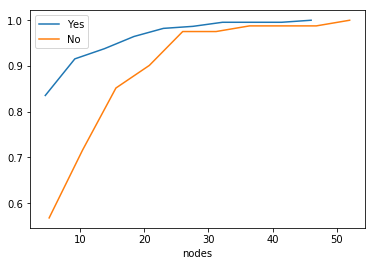

In [46]:
#Histogram computes the occurrences of input data that fall within each bin, which in turns determines the area of each bar.
counts1, bin_edges1 = np.histogram(status_yes['nodes'], bins=10, density = True)
#calculates probability density for status=yes
pdf1 = counts1/(sum(counts1))
print("pdf1 = ",pdf1);
print("bin1 = ",bin_edges1)
#calculates cumulative sum of pdf1 array 
cdf1 = np.cumsum(pdf1)
print("cdf1 = ",cdf1)
#plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(status_no['nodes'], bins=10, density = True)
#calculates probability density for status=no
pdf2 = counts2/(sum(counts2))
print("pdf2 = ",pdf2);
print("bin2 = ",bin_edges2)
#calculates cumulative sum of pdf2 array 
cdf2 = np.cumsum(pdf2)
print("cdf2 = ",cdf2)
#plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

# Observations:
1)83.55% of the patients who have survived had nodes in the range of 0–4.6

### 3) Box plots

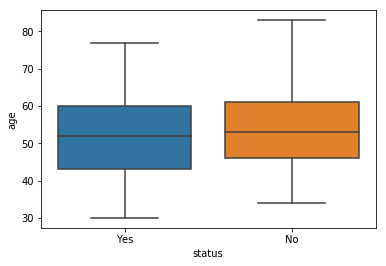

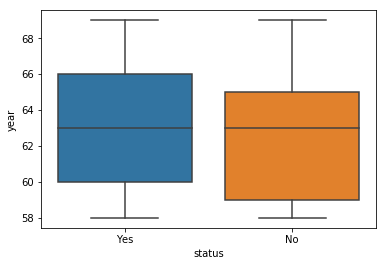

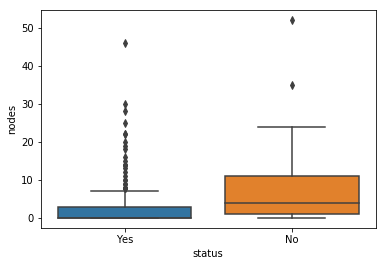

In [48]:
#The boxplot indicates box which extends from the lower to upper quartile values of the data, with a line at the median
#The whiskers extend from the box to show the range of the data
sns.boxplot(x='status',y='age',data=haber)
plt.show()
sns.boxplot(x='status',y='year',data=haber)
plt.show()
#Outlier points are those past the end of the whiskers
sns.boxplot(x='status',y='nodes',data=haber)
plt.show()

# Observations:
1)Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances. <br />
<br />
2)A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival. <br />
<br />
3)There were comparatively more people who got operated in the year 1965 <br />
<br />
4)There were comparatively more people in the age group 50 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient. <br />

### 4) Scatter plots

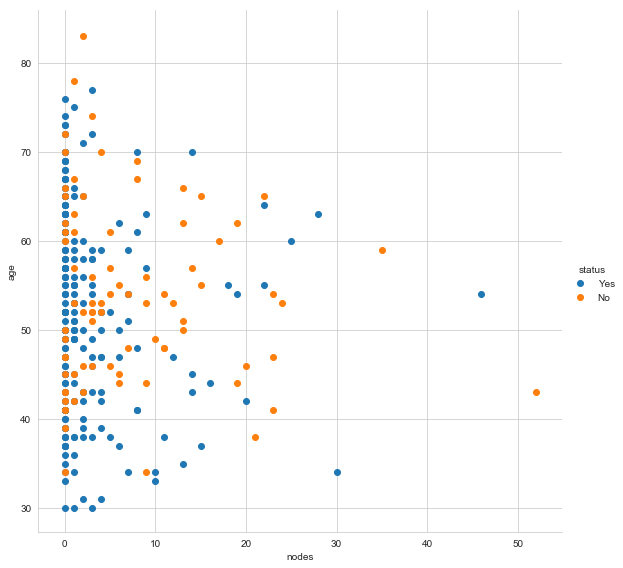

In [52]:
#It is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables
sns.set_style('whitegrid')
sns.FacetGrid(haber, hue = 'status' , height = 8)\
 .map(plt.scatter,'nodes','age')\
 .add_legend()
plt.show()

# Observation:
1)Patients with 0 nodes are more likely to survive irrespective of their age. <br />
<br />
2)There are hardly any patients who have nodes more than 25. <br />
<br />
3)Patients aged more than 50 with nodes more than 10 are less likely to survive.

### 5) Pair Plots

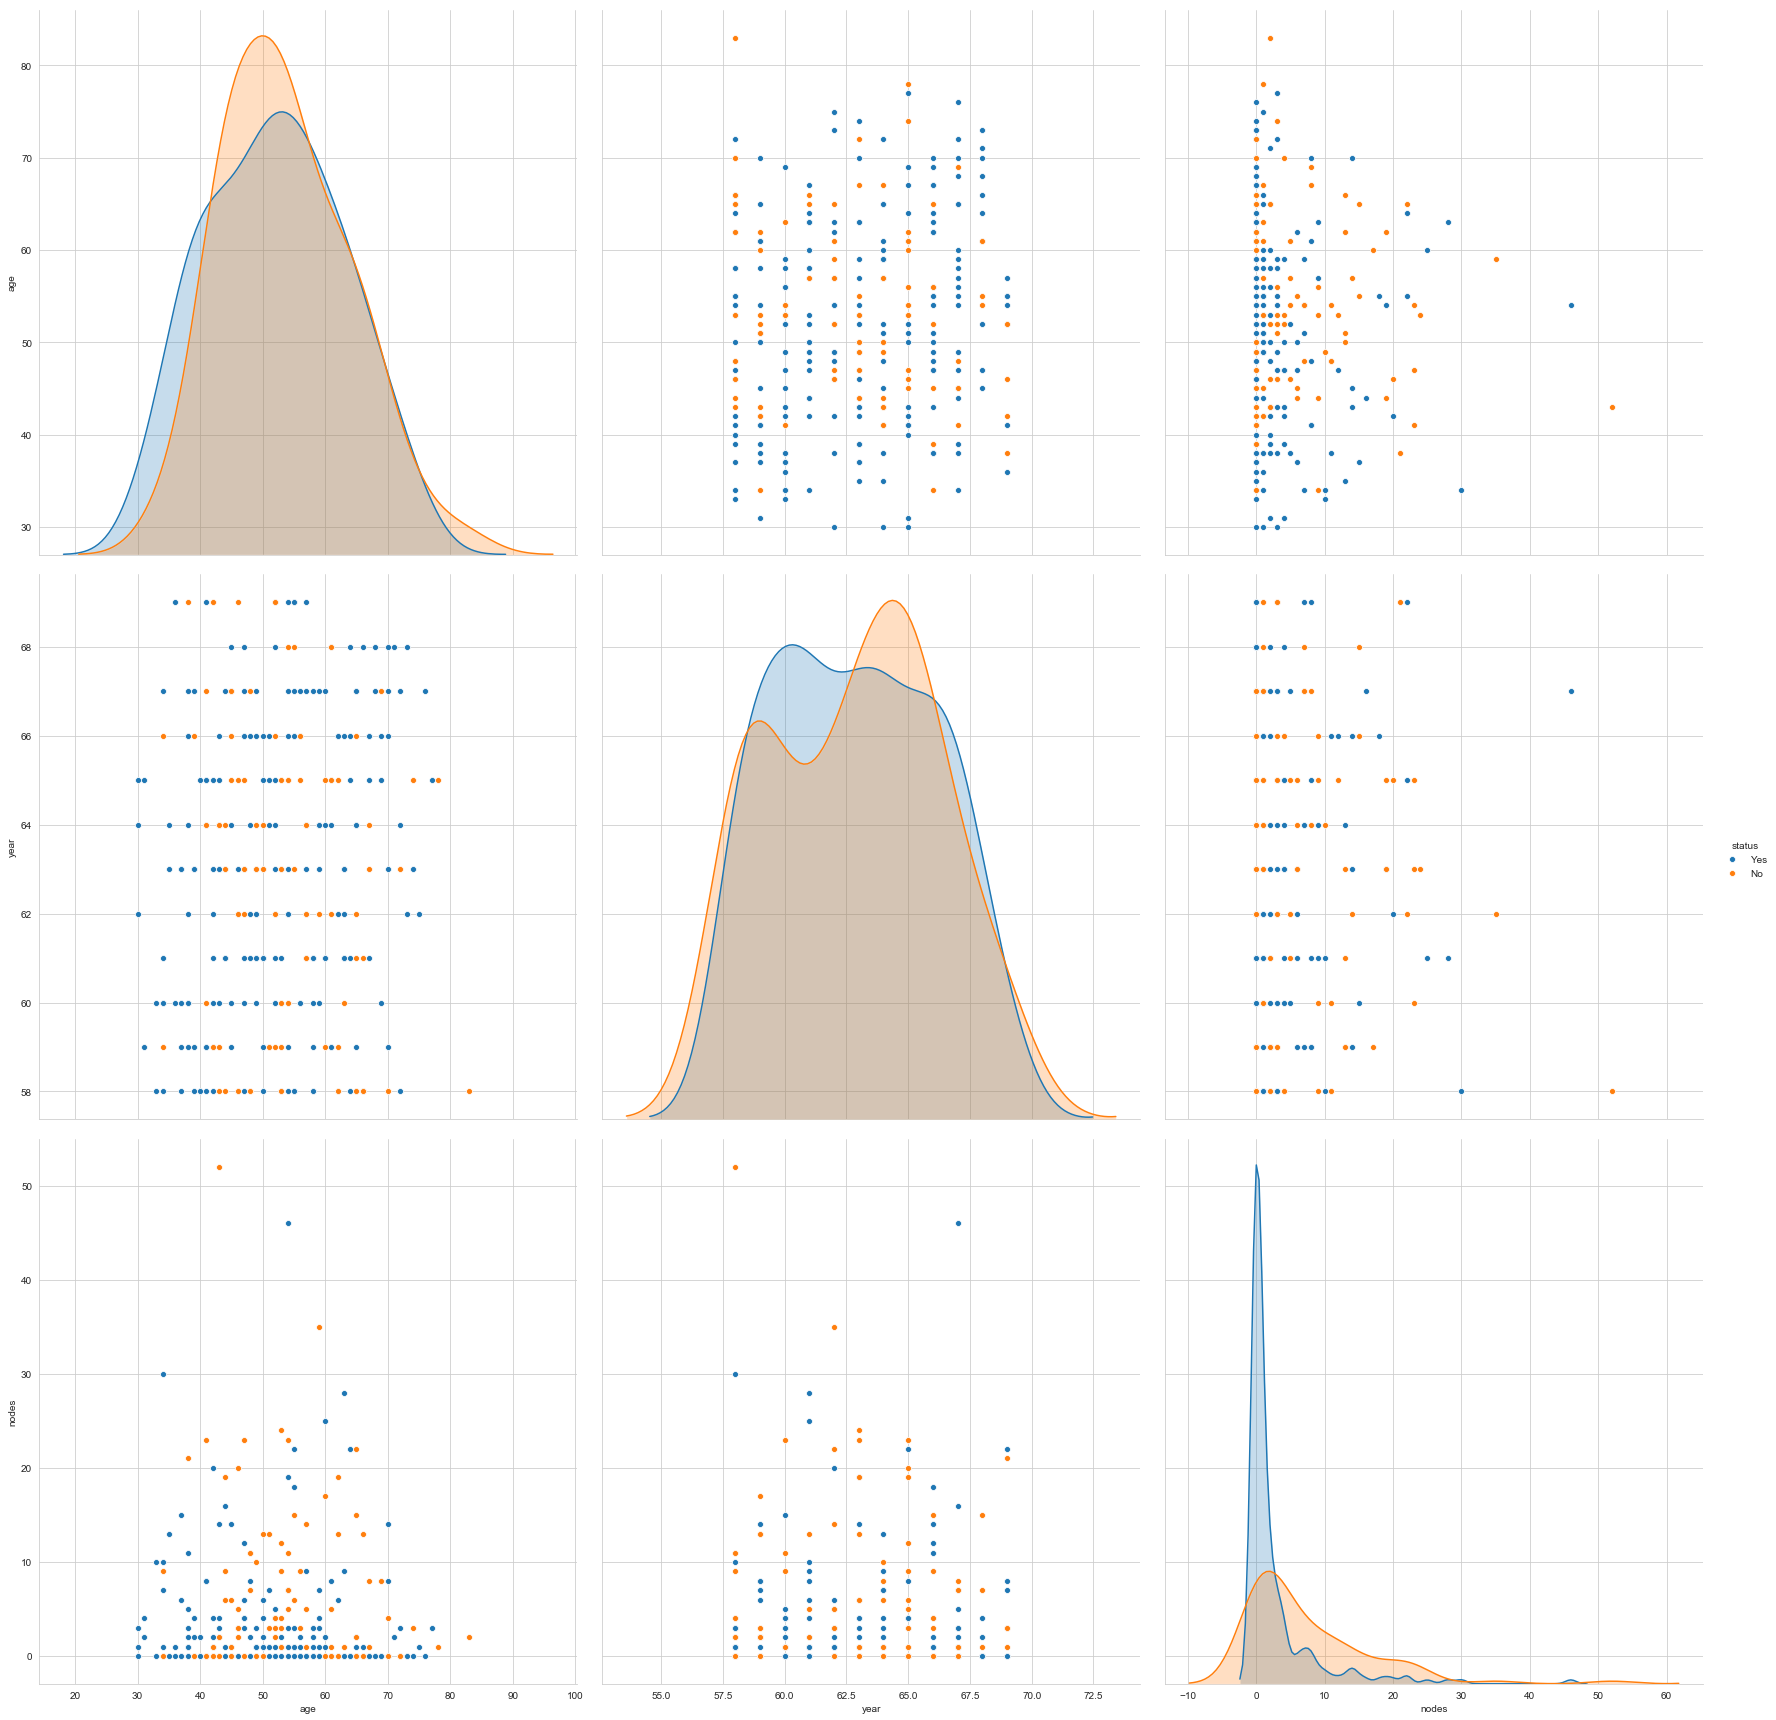

In [56]:
#It will create a grid of Axes such that each variable in data will be shared in the y-axis across a single row 
#and in the x-axis across a single column. 
sns.set_style('whitegrid')
sns.pairplot(haber, hue='status', height = 8)
plt.show()

### 6) Contour Plot

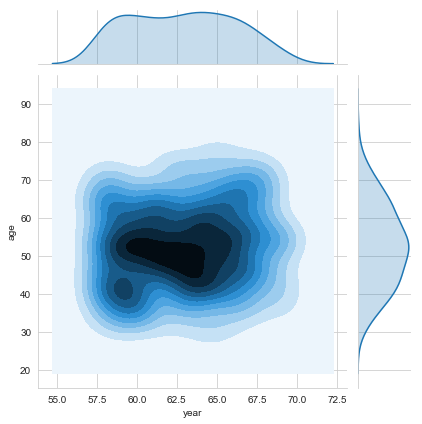

In [58]:
# A contour line or isoline of a function of two variables is a curve along which the function has a constant value.
#It is a cross-section of the three-dimensional graph.
sns.jointplot(x = 'year', y = 'age', data = haber, kind = 'kde')
plt.show()

# Observation:
1)From 1960 to 1964, more operations done on the patients in the age group 45 to 55.

# Conclusions:
1) Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival. <br />
<br />
2) Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival. <br />
<br />
3) The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced. 